In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Advertising (1).csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
data.rename(columns={'Unnamed: 0':'Name'},inplace=True)

In [8]:
data

,Name,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Exploratory Data Analysis

In [10]:
data.head()

,Name,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<Axes: xlabel='TV', ylabel='Count'>

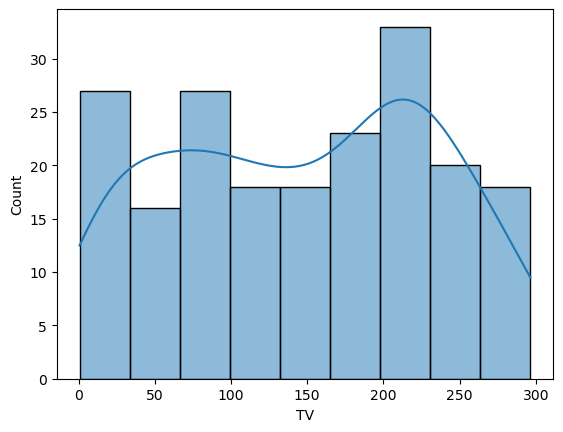

In [11]:
sns.histplot(x=data.TV,kde=True)

<Axes: xlabel='Radio', ylabel='Count'>

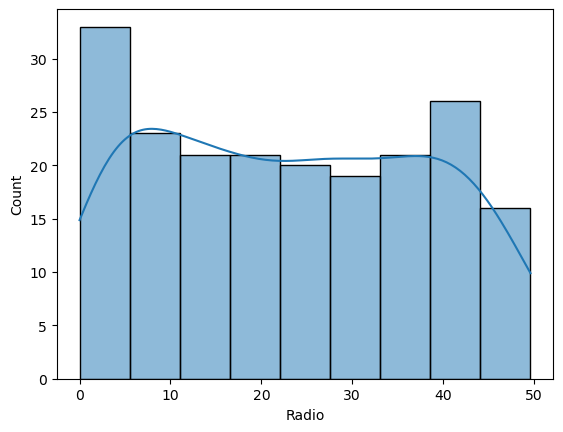

In [12]:
sns.histplot(x=data.Radio,kde=True)

<Axes: xlabel='TV', ylabel='Sales'>

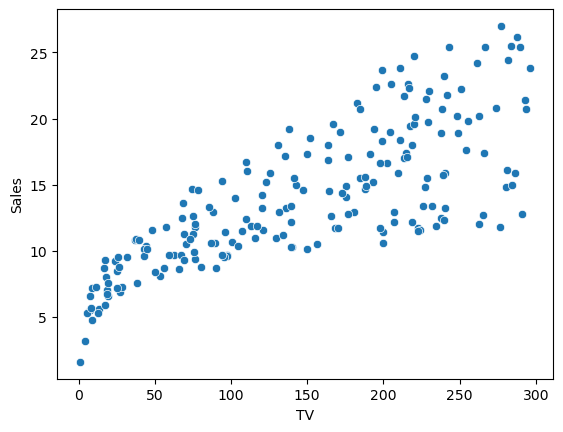

In [13]:
sns.scatterplot(x='TV',y='Sales',data=data)

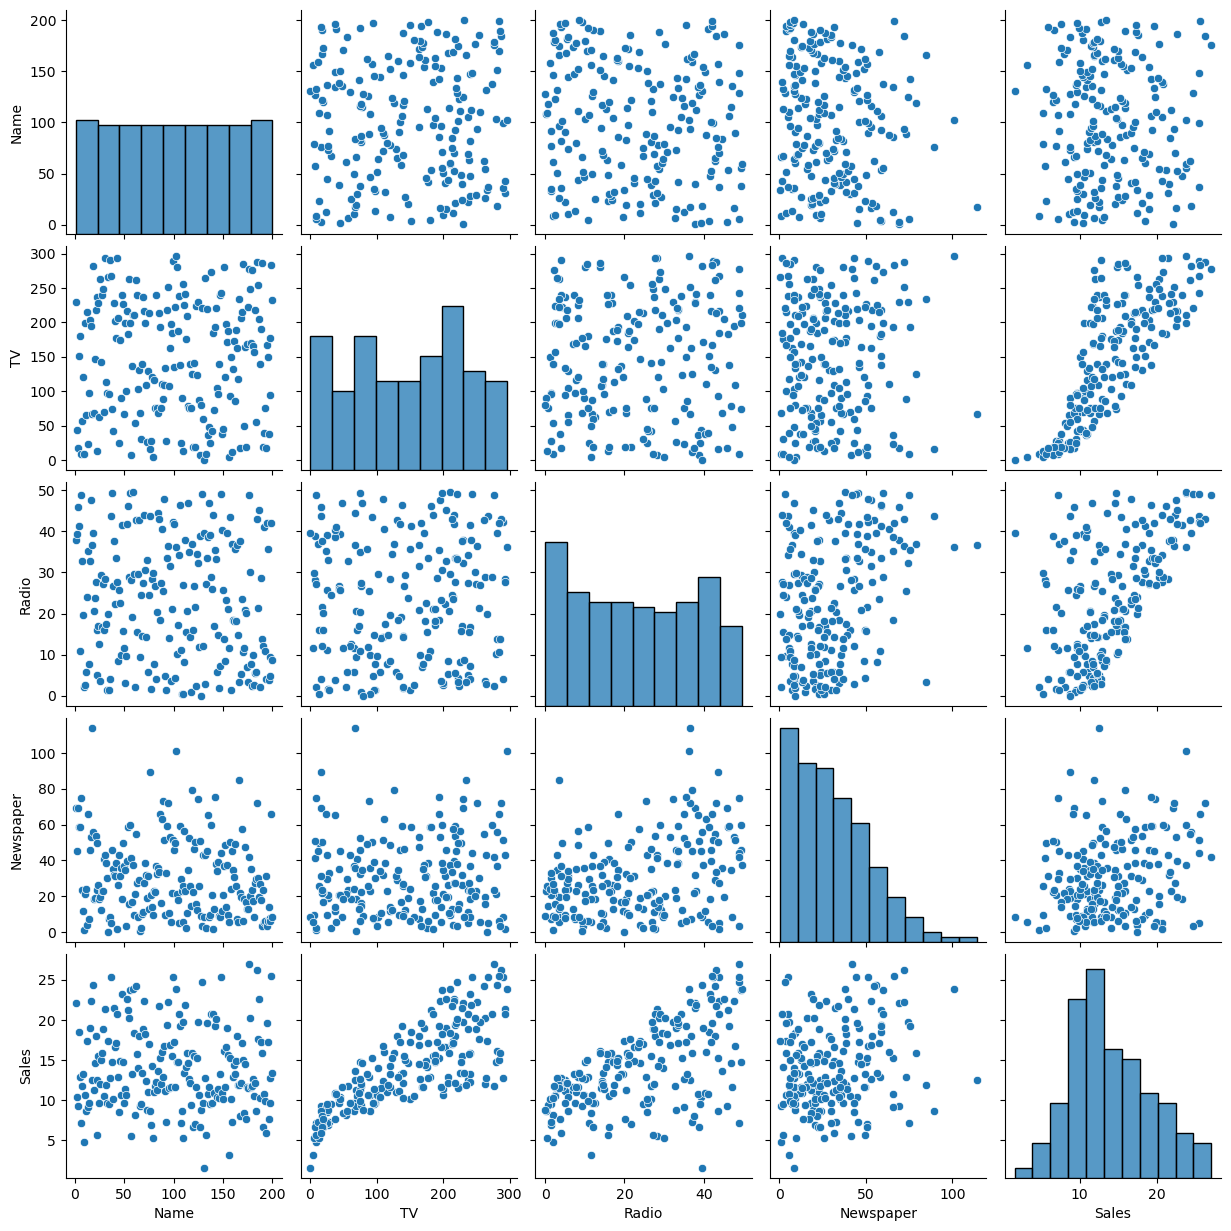

In [14]:
sns.pairplot(data)

## Data preproceesing And feature Engineering

In [30]:
data.isnull().sum()

Name         0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: xlabel='TV'>

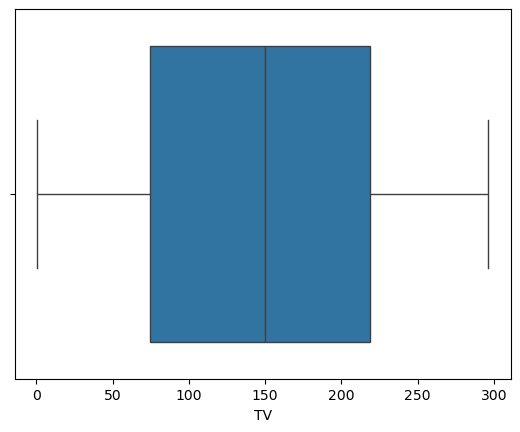

In [36]:
sns.boxplot(x='TV',data=data)

<Axes: xlabel='Radio'>

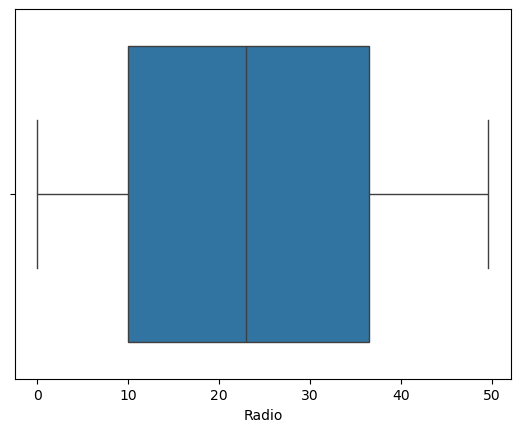

In [38]:
sns.boxplot(x='Radio',data=data)

<Axes: xlabel='Newspaper'>

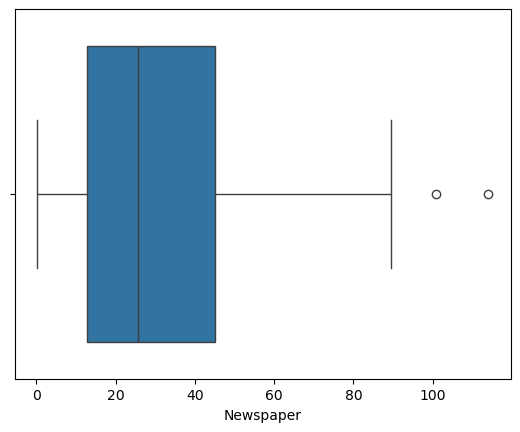

In [40]:
sns.boxplot(x='Newspaper',data=data)

In [80]:
data[data['Newspaper']>90]

,TV,Radio,Newspaper,Sales


In [48]:
data.loc[data['Newspaper']>90,'Newspaper']=np.median(data['Newspaper'])

In [50]:
# another technique find outlier seeb MLA

<Axes: xlabel='Newspaper'>

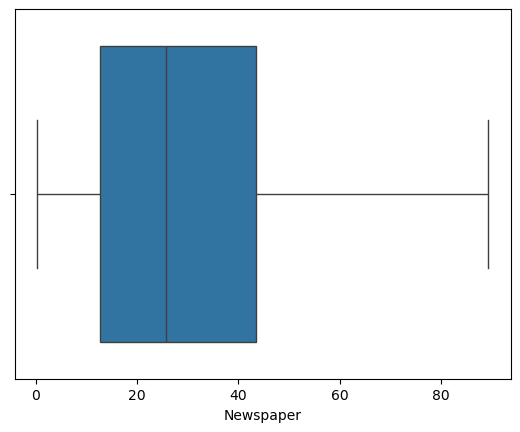

In [54]:
sns.boxplot(x='Newspaper',data=data)

## Feature Selection

In [59]:
# the neede feature and drop the unvanted

In [61]:
data.drop('Name',axis=1,inplace=True)

In [63]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Model Creation

In [68]:
#cheacking co Relation inputs # dont touch output
#note
# if the co realtion >0.90 drop one of the coloum
#if the co relation < -0.90 drop one of the coloum
# if the co relation is equal to zero ,the drop one of the coloum

<Axes: >

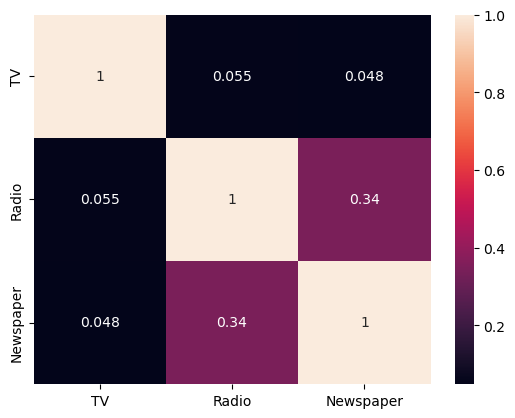

In [74]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

In [82]:
#step1 independent and dependent variable creation
x=data[['TV','Radio','Newspaper']]#x variable contain all inputs
##x=data.drop("Sales",axis=1 ) for large data
y=data.Sales ## yis output

### Split data for training and testing¶

In [85]:
# trainingn and testingn data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [87]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() # object creation
model.fit(x_train,y_train) # training of linear reggression

LinearRegression()

In [89]:
y_predict=model.predict(x_test)#predictin sales based on tv,radio,newspaper
y_predict

array([13.90594072,  9.56121233,  6.96135204, 15.30835906, 18.283714  ,
       15.78956979,  7.38237245, 20.38826587, 13.27822055, 17.16727733,
       11.07488479, 19.55623404,  8.98763189, 10.89560773, 13.97186621,
       12.7415974 ,  9.25165439, 17.93731093, 16.45431986, 18.71671093,
       16.77620267, 15.88923013, 11.82910634, 12.29669689, 15.14417221,
       12.17451507, 15.40470751,  7.94044894, 16.73415586, 13.88695975,
       16.33863594, 17.02110299, 12.86955652, 12.91237909,  8.81448653,
       10.96209803, 21.97203417, 20.02651213, 16.08996152, 20.234181  ,
       21.28663281, 17.2334117 , 21.14607663, 15.04261681, 19.62486668,
       18.94828449, 17.50929831, 10.33480993,  9.62631792, 12.94225588,
       12.7199576 , 14.45140929, 17.23848547, 17.13032568,  8.3782865 ,
       17.1434207 ,  8.98948462,  3.89948927,  7.76855345, 24.86560801])

In [91]:
y_test

112    14.1
29     10.5
182     8.7
199    13.4
193    19.6
85     15.2
10      8.6
54     20.2
115    12.6
35     12.8
12      9.2
92     19.4
13      9.7
126     6.6
174    11.5
2       9.3
44      8.5
3      18.5
113    15.9
14     19.0
23     15.5
25     12.0
6      11.8
134    10.8
165    11.9
173    11.7
45     14.9
65      9.3
48     14.8
122    11.6
178    11.8
64     18.0
9      10.6
57     13.2
78      5.3
71     12.4
128    24.7
176    20.2
131    12.7
53     21.2
137    20.8
163    18.0
111    21.8
123    15.2
109    19.8
141    19.2
41     17.1
130     1.6
140    10.9
5       7.2
159    12.9
100    11.7
11     17.4
187    17.3
24      9.7
89     16.7
66      9.5
8       4.8
172     7.6
175    27.0
Name: Sales, dtype: float64

In [93]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [95]:
 r2score

0.801954776669705

In [97]:
mse=mean_squared_error(y_test,y_predict)

In [99]:
mse

5.034210004318814

In [105]:
import math

In [107]:
rmse=math.sqrt(mse)

In [109]:
rmse

2.243704526964015

In [111]:
mae=mean_absolute_error(y_test,y_predict)

In [113]:
mae

1.5402401881795837

In [115]:
x_test.shape

(60, 3)

In [119]:
adjustedR2=1-(1-80.19)*(60-1)/60-3-1

In [121]:
adjustedR2

74.87016666666666